# Exploratory Lake Watershed Statistics
**Last Updated 1-19-2021**

## Data
---

Lakes sampled by ABM at least once between 2012 - 2019

Watershed characteristics to date calculated as part of the HSI

In [1]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import os

In [24]:
# import data

lakes = pd.read_csv('data/Lakes_2012-2019_HSI_GNISID.csv')
print(len(lakes))
lake_sites = lakes.loc[:,['STA_SEQ', 'YLat', 'XLong']]
lakesW = lakes.drop(columns=['STA_SEQ', 'YLat', 'XLong'])
lakesW = lakesW.drop_duplicates()

#lakesW.columns
lakesW.info()

82
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 81
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GNIS_ID     71 non-null     int64  
 1   GNIS_Name   71 non-null     object 
 2   AreaSqKm    71 non-null     float64
 3   Elevation   71 non-null     int64  
 4   HydroID     71 non-null     int64  
 5   DrainID     71 non-null     int64  
 6   Strahler    71 non-null     int64  
 7   StrMi       71 non-null     float64
 8   SqMi        71 non-null     float64
 9   Dam         71 non-null     int64  
 10  Div         71 non-null     float64
 11  ICCnt       71 non-null     int64  
 12  ICSum       71 non-null     int64  
 13  POTW        71 non-null     float64
 14  IC_Avg      71 non-null     float64
 15  SD_Pct      71 non-null     float64
 16  Q99         71 non-null     float64
 17  DIV_CFS     71 non-null     float64
 18  POTW_CFS    71 non-null     float64
 19  DivQ99      71 non-null     

## Explore Lake drainage basin characteristics
---

In [40]:
lakesW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 81
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GNIS_ID     71 non-null     int64  
 1   GNIS_Name   71 non-null     object 
 2   AreaSqKm    71 non-null     float64
 3   Elevation   71 non-null     int64  
 4   HydroID     71 non-null     int64  
 5   DrainID     71 non-null     int64  
 6   Strahler    71 non-null     int64  
 7   StrMi       71 non-null     float64
 8   SqMi        71 non-null     float64
 9   Dam         71 non-null     int64  
 10  Div         71 non-null     float64
 11  ICCnt       71 non-null     int64  
 12  ICSum       71 non-null     int64  
 13  POTW        71 non-null     float64
 14  IC_Avg      71 non-null     float64
 15  SD_Pct      71 non-null     float64
 16  Q99         71 non-null     float64
 17  DIV_CFS     71 non-null     float64
 18  POTW_CFS    71 non-null     float64
 19  DivQ99      71 non-null     flo

In [39]:
lakesW[['StrMi','SqMi','IC_Avg','SD_Pct','HSI']].describe()

,StrMi,SqMi,IC_Avg,SD_Pct,SumMetric
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,61.420414,28.222977,1.735337,8.578501,6.098592
std,374.630464,177.001610,2.000866,10.618400,1.385176
min,0.330000,0.260000,0.011311,0.000000,4.000000
25%,2.706071,1.383455,0.484738,0.640270,5.000000
50%,6.190000,3.014584,1.134622,3.739488,6.000000
75%,14.029849,5.466803,2.236207,12.736749,7.000000
max,3155.121287,1492.938867,10.827919,47.765397,10.000000


In [36]:
# Top 5 largest drainage basins
lakesW[['GNIS_ID','GNIS_Name','SqMi']].sort_values(by=['SqMi'],ascending=False).head(5)

,GNIS_ID,GNIS_Name,SqMi
50,212322,Lake Zoar,1492.938867
36,212624,Eagleville Pond,110.688188
54,209579,Pachaug Pond,52.426038
71,207318,Glasgo Pond,38.228036
19,205246,Bantam Lake,30.933808


In [41]:
# Top 5 smallest drainage basins
lakesW[['GNIS_ID','GNIS_Name','SqMi']].sort_values(by=['SqMi'],ascending=True).head(5)

,GNIS_ID,GNIS_Name,SqMi
55,206648,Deep Lake,0.260000
72,205357,Beardsley Pond,0.330000
16,205234,Ball Pond,0.380000
67,209620,Park Pond,0.435617
2,211388,Lake Terramuggus,0.630000


In [42]:
# Lakes with the highest IC in the drainage basins
lakesW[['GNIS_ID','GNIS_Name','IC_Avg']].sort_values(by=['IC_Avg'],ascending=False).head(5)

,GNIS_ID,GNIS_Name,IC_Avg
51,210861,Silver Lake,10.827919
2,211388,Lake Terramuggus,6.834160
70,207373,Gorton Pond,6.757855
16,205234,Ball Pond,6.628182
39,209870,Pocotopaug Lake,6.206345


In [43]:
# Lakes with the lowest IC in the drainage basins
lakesW[['GNIS_ID','GNIS_Name','IC_Avg']].sort_values(by=['IC_Avg'],ascending=True).head(5)

,GNIS_ID,GNIS_Name,IC_Avg
37,210190,Riga Lake,0.011311
21,209459,Lake Of Isles,0.030348
38,211651,Uncas Pond,0.044121
30,209411,Norwich Pond,0.054775
81,209973,Powers Lake,0.089032


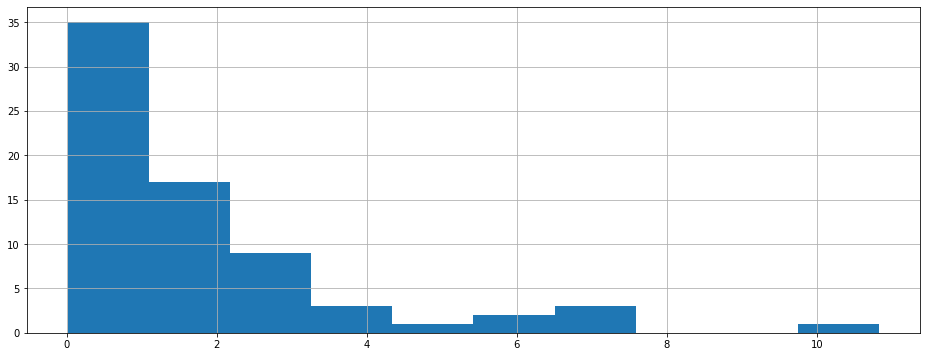

In [51]:
lakesW['IC_Avg'].hist(bins=10, figsize = (16,6));